# Exploratory data analysis of force of mortality data
aka een hoop plotjes en figuurtjes in een aparte file want dat duurt lang om die te runnen

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

## 1. Importing the dataset
I use the same dataset as the DAV, in their notebook they mention the data is extracted from the Human Demography Database (Is dat iets bekend? Ik vond er niet direct iets van op het internet, maar de dataset is ook meegegeven in hun github dus daar heb ik deze gedownload) It covers mortality rates for 11 countries or regions. There is data for both men and woman from ages 0 to 100. Missing data was imputed. 

In [2]:
MYwd= os.getcwd()
file_path = MYwd+"\GitHub DAV\mortality.csv"

df = pd.read_csv(file_path)

# add a column with the mortality rates (originally, only the log_mortality rates are included)
df['mortality'] = np.exp(df['log_mortality'])

# the dataset contains data from west and east germany seperately. we only use the rates for the entire population of germany (DEUT)
df = df[(df['Country'].isin(["CHE","DEUT","DNK", "ESP", "FRATNP", "ITA", "JPN", "POL", "USA"]))]

print(df.head(10))
#print(df.info())

  Country  Year  Gender  Age  log_mortality  mortality
0     CHE  1950  Female    0      -3.601125   0.027293
1     CHE  1950  Female    1      -5.793926   0.003046
2     CHE  1950  Female    2      -6.392539   0.001674
3     CHE  1950  Female    3      -6.697494   0.001234
4     CHE  1950  Female    4      -6.900780   0.001007
5     CHE  1950  Female    5      -7.476916   0.000566
6     CHE  1950  Female    6      -7.374564   0.000627
7     CHE  1950  Female    7      -7.469874   0.000570
8     CHE  1950  Female    8      -7.492945   0.000557
9     CHE  1950  Female    9      -7.885921   0.000376


## 2. Exploratory data analysis
Ik zal proberen enkele figuurtjes te maken, maar eerder met doel om dat voor onze uiteindelijke dataset al te kunnen want voor de analysis van deze dataset kan je gewoon kijken naar de file van DAV

<Figure size 1008x576 with 0 Axes>

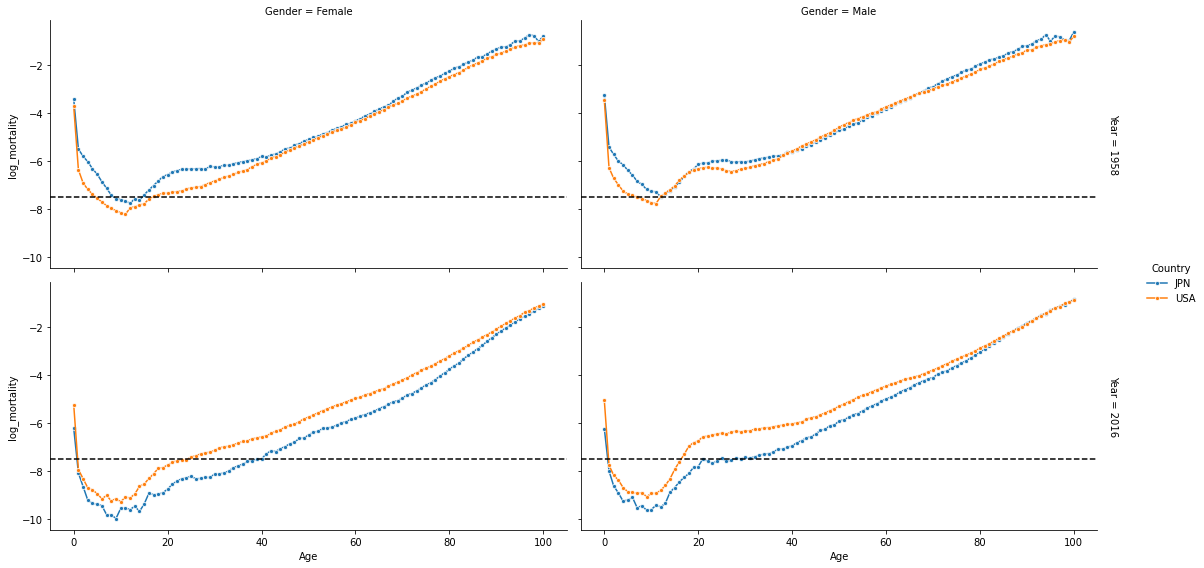

In [3]:
# filter some years and countries
filtered_df = df[(df['Year'].isin([1958, 2016])) & (df['Country'].isin(['JPN', 'USA']))]

# create the figure
plt.figure(figsize=(14, 8))

# create facetgrid for year and gender
g = sns.FacetGrid(filtered_df, col='Gender', row='Year', hue='Country', height=4, aspect=2, 
                  margin_titles=True)

g.map(sns.lineplot, 'Age', 'log_mortality', marker='o',markersize=4).add_legend()

# Add a horizontal line at y = -7.5
for ax in g.axes.flat:
    ax.axhline(y=-7.5, color="black", linestyle="--")

In [4]:
df['Country_Gender'] = df['Country'] + " - " + df['Gender']  # dit hebben we nodig zodat ge die wrapping kunt maken voor country en gende

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

def lighten_cmap(cmap_name='winter', factor=0.5):
    """Lighten a given colormap by blending it with white."""
    base = cm.get_cmap(cmap_name)
    colors = base(np.linspace(0, 1, 256))
    white = np.ones((256, 4))  # RGBA for white
    colors = colors * (1 - factor) + white * factor
    return mcolors.ListedColormap(colors)

# Example usage
light_winter = lighten_cmap('winter', factor=0.3)

<Figure size 1008x576 with 0 Axes>

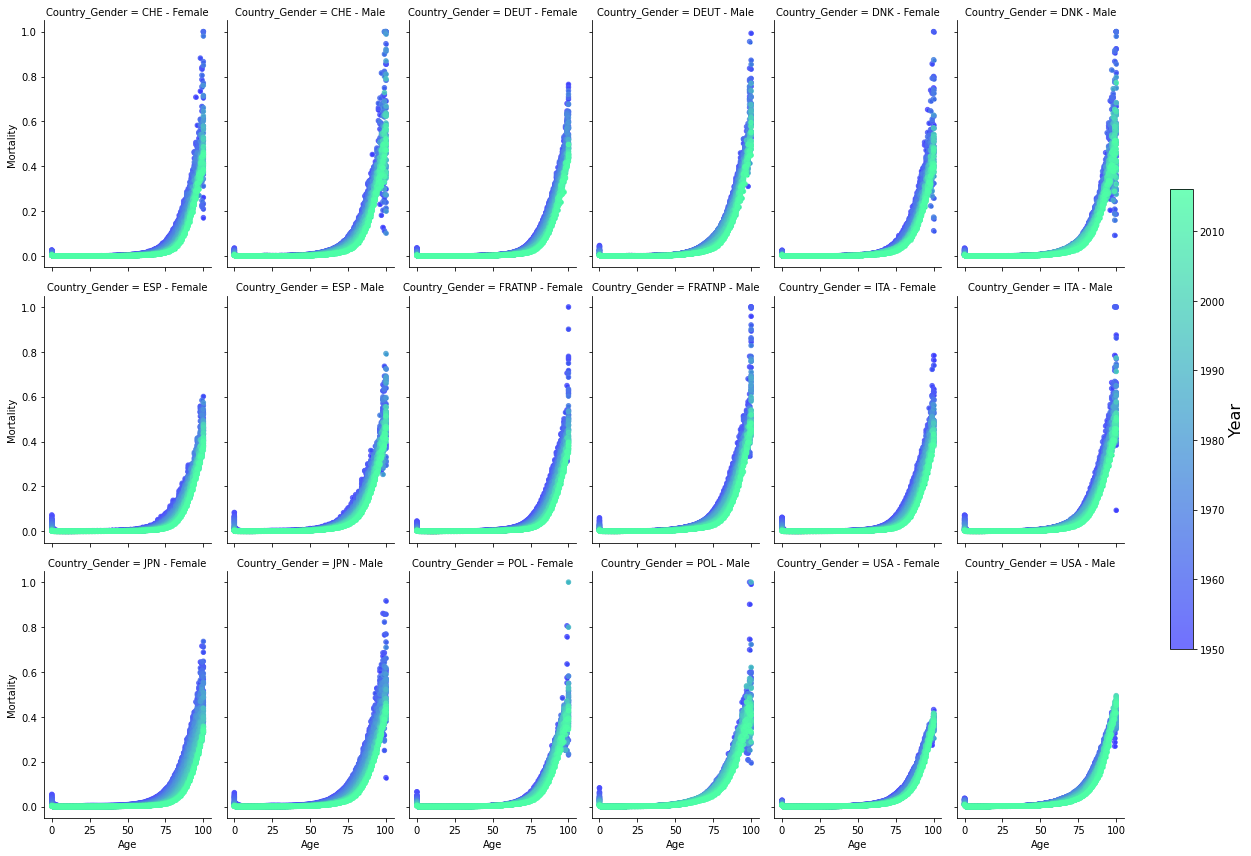

In [6]:
plt.figure(figsize=(14,8))

# create facetgrid for gender and country
df['Country_Gender'] = df['Country'] + " - " + df['Gender']  # dit hebben we nodig zodat ge die wrapping kunt maken voor country en gender
g = sns.FacetGrid(df, col='Country_Gender', hue='Year', palette='winter',
                  margin_titles=True, height=4, aspect=0.7, col_wrap=6)

g.map(sns.scatterplot, 'Age', 'mortality', s=20)

# Adjust the title, legend, and axis formatting
g.set_axis_labels("Age", "Mortality")


for ax, (_, subset) in zip(g.axes.flat, df.groupby(['Country', 'Gender'])):
    scatter = ax.scatter(subset['Age'], subset['mortality'], 
                         c=subset['Year'], cmap=light_winter, s=20, alpha=0.8)
    
cbar = g.fig.colorbar(scatter, ax=g.axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Year', fontsize=16)

<Figure size 1008x576 with 0 Axes>

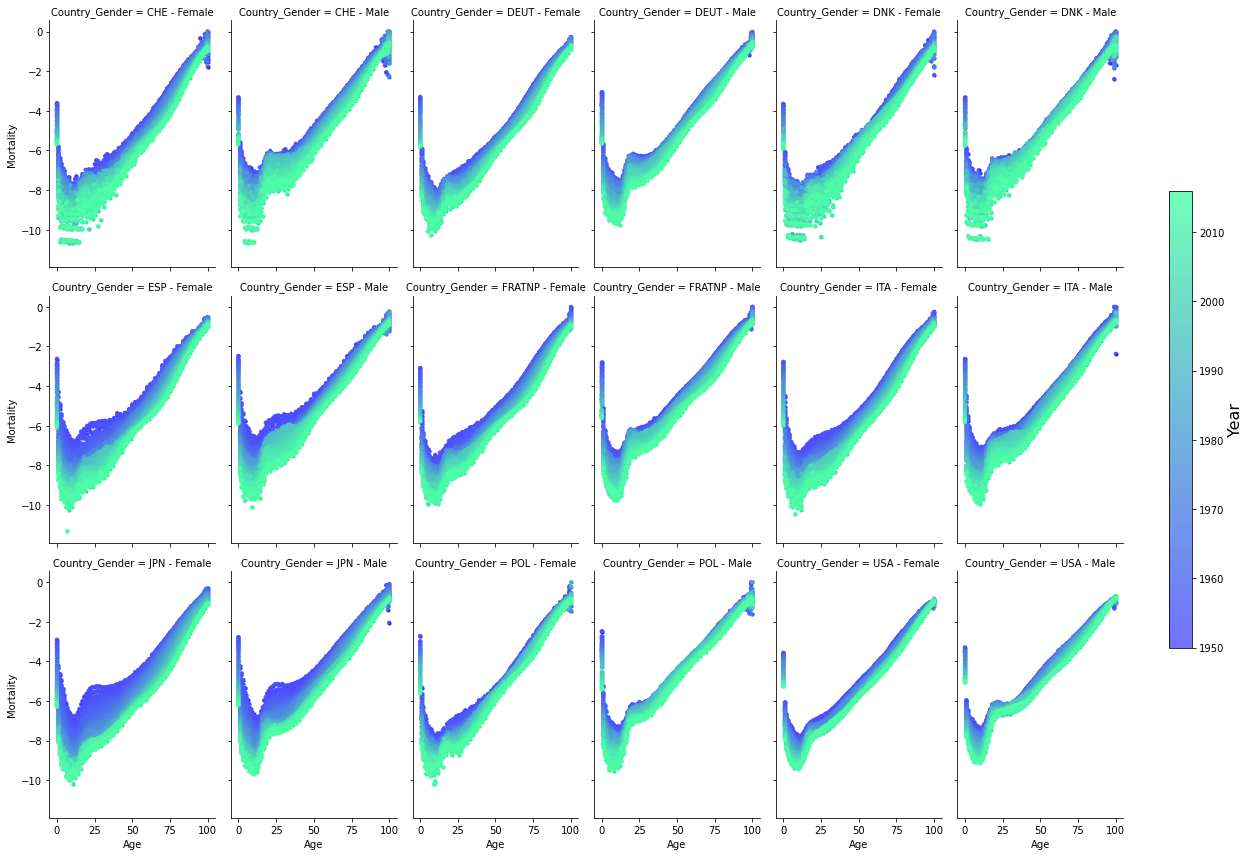

In [7]:
plt.figure(figsize=(14,8))

# create facetgrid for gender and country
df['Country_Gender'] = df['Country'] + " - " + df['Gender']  # dit hebben we nodig zodat ge die wrapping kunt maken voor country en gender
g = sns.FacetGrid(df, col='Country_Gender', hue='Year', palette='winter',
                  margin_titles=True, height=4, aspect=0.7, col_wrap=6)

g.map(sns.scatterplot, 'Age', 'log_mortality', s=15)

# Adjust the title, legend, and axis formatting
g.set_axis_labels("Age", "Mortality")


for ax, (_, subset) in zip(g.axes.flat, df.groupby(['Country', 'Gender'])):
    scatter = ax.scatter(subset['Age'], subset['log_mortality'], 
                         c=subset['Year'], cmap=light_winter, s=15, alpha=0.8)
    
cbar = g.fig.colorbar(scatter, ax=g.axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Year', fontsize=16)

df = df.drop(columns=['Country_Gender'])

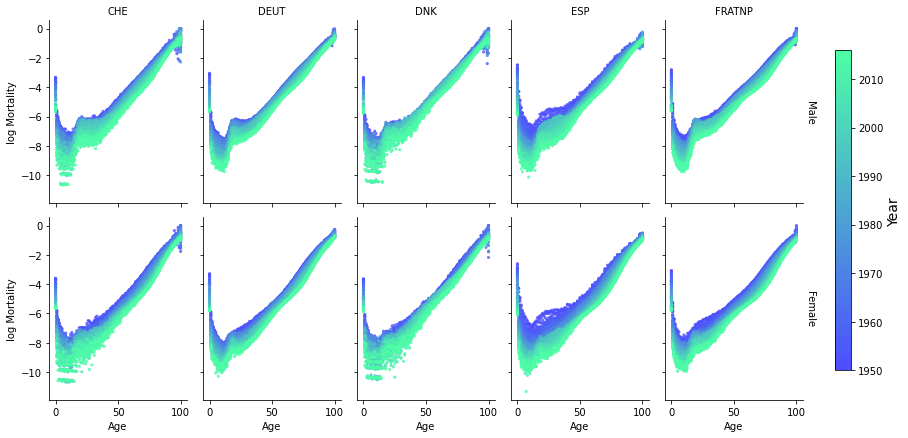

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make sure gender order is consistent
df['Gender'] = pd.Categorical(df['Gender'], categories=['Male', 'Female'], ordered=True)

# Select your subset of countries (e.g., 5 for one figure)
selected_countries = df['Country'].unique()[:5]
df_subset = df[df['Country'].isin(selected_countries)]

# Custom scatterplot function
def custom_scatter(data, **kwargs):
    plt.scatter(data['Age'], data['log_mortality'], 
                c=data['Year'], cmap=light_winter, s=10, alpha=0.8, edgecolors='none')

# Set up FacetGrid: rows = Gender, columns = Country
g = sns.FacetGrid(df_subset, row='Gender', col='Country', margin_titles=True, height=3, aspect=0.8)  # verander aspect=1.2 als je per  3 plot
g.map_dataframe(custom_scatter)

# Dummy scatter for shared colorbar
subset = df_subset[(df_subset['Country'] == df_subset['Country'].iloc[0]) & (df_subset['Gender'] == 'Male')]
scatter = plt.scatter(subset['Age'], subset['log_mortality'], c=subset['Year'], cmap=light_winter, s=0)
cbar = g.fig.colorbar(scatter, ax=g.axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Year', fontsize=14)

g.set_axis_labels("Age", "log Mortality")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
#g.fig.suptitle("Mortality by Age, Gender, and Country", fontsize=16, y=1.02)
#plt.tight_layout()


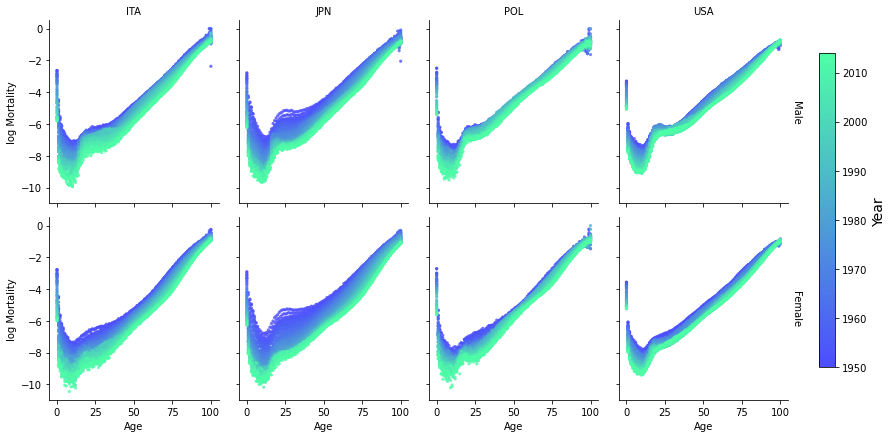

In [37]:
# Make sure gender order is consistent
df['Gender'] = pd.Categorical(df['Gender'], categories=['Male', 'Female'], ordered=True)

# Select your subset of countries (e.g., 5 for one figure)
selected_countries = df['Country'].unique()[5:]
df_subset = df[df['Country'].isin(selected_countries)]

# Custom scatterplot function
def custom_scatter(data, **kwargs):
    plt.scatter(data['Age'], data['log_mortality'], 
                c=data['Year'], cmap=light_winter, s=10, alpha=0.8, edgecolors='none')

g = sns.FacetGrid(df_subset, row='Gender', col='Country', margin_titles=True, height=3, aspect=0.8)
g.map_dataframe(custom_scatter)

# Set the exact same figure size for both plots (first 5 and next 4 countries)
g.fig.set_size_inches(12, 6)  # Adjust values to fit your document width

# Add shared colorbar
subset = df_subset[(df_subset['Country'] == df_subset['Country'].iloc[0]) & (df_subset['Gender'] == 'Male')]
scatter = plt.scatter(subset['Age'], subset['log_mortality'], c=subset['Year'], cmap=light_winter, s=0)
cbar = g.fig.colorbar(scatter, ax=g.axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Year', fontsize=14)

g.set_axis_labels("Age", "log Mortality")
g.set_titles(row_template="{row_name}", col_template="{col_name}")

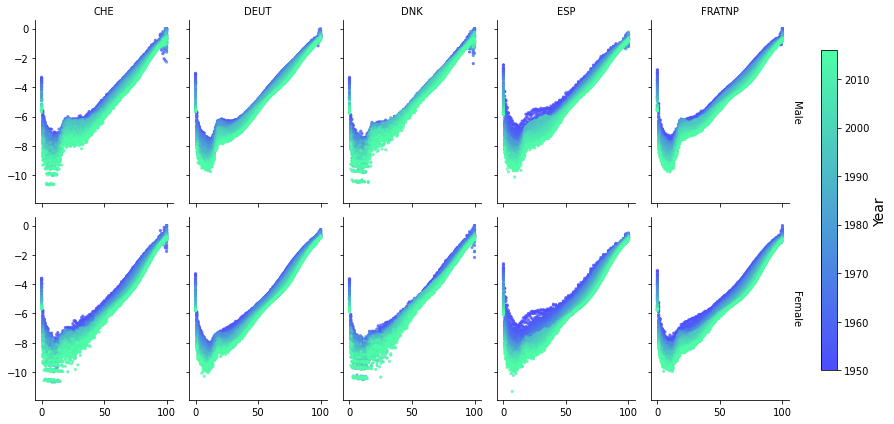

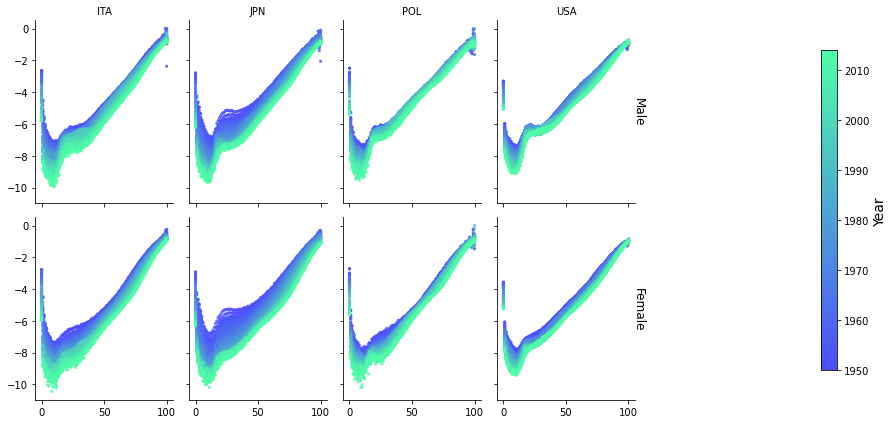

In [59]:
from matplotlib.transforms import Bbox

# Make sure Gender is ordered
df['Gender'] = pd.Categorical(df['Gender'], categories=['Male', 'Female'], ordered=True)

# Define fixed order of countries (use same in both figures)
all_countries = df['Country'].unique()
first_countries = all_countries[:5]
second_countries = all_countries[5:9]

# Pad second_countries with a placeholder so both lists have same length
second_countries_padded = list(second_countries) + ['(empty)']

# Add dummy rows for the '(empty)' column
dummy_rows = pd.DataFrame({
    'Country': ['(empty)'] * 2,  # one for each gender
    'Gender': ['Male', 'Female'],
    'Age': [0, 0],
    'log_mortality': [0, 0],
    'Year': [2000, 2000]
})
df_padded = pd.concat([df, dummy_rows], ignore_index=True)

# Create first grid (normal 5 countries)
df1 = df[df['Country'].isin(first_countries)]
g1 = sns.FacetGrid(df1, row='Gender', col='Country', margin_titles=True,
                   height=3, aspect=0.8, row_order=['Male', 'Female'], col_order=first_countries)
g1.map_dataframe(custom_scatter)
g1.set_titles(row_template="{row_name}", col_template="{col_name}")

# Add colorbar using a dummy scatter (invisible, just for scale)
subset = df1[(df1['Country'] == df1['Country'].iloc[0]) & (df1['Gender'] == 'Male')]
scatter = plt.scatter(subset['Age'], subset['log_mortality'], c=subset['Year'], cmap=light_winter, s=0)

# Add shared colorbar to the whole grid
cbar = g1.fig.colorbar(scatter, ax=g1.axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Year', fontsize=14)

# Create second grid with dummy padded column
df2 = df_padded[df_padded['Country'].isin(second_countries_padded)]
g2 = sns.FacetGrid(df2, row='Gender', col='Country', margin_titles=True,
                   height=3, aspect=0.8,  row_order=['Male', 'Female'], col_order=second_countries_padded)
g2.map_dataframe(custom_scatter)
g2.set_titles(row_template="{row_name}", col_template="{col_name}")

# Add colorbar using a dummy scatter (invisible, just for scale)
subset = df2[(df2['Country'] == df2['Country'].iloc[0]) & (df2['Gender'] == 'Male')]
scatter = plt.scatter(subset['Age'], subset['log_mortality'], c=subset['Year'], cmap=light_winter, s=0)

# Add shared colorbar to the whole grid
cbar = g2.fig.colorbar(scatter, ax=g2.axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Year', fontsize=14)

# === Hide the (empty) subplot ===
for gender in ['Male', 'Female']:
    ax = g2.axes_dict[(gender, '(empty)')]
    ax.clear()
    ax.set_visible(False)

# === Manually add row labels (Male / Female) ===
# Determine visible countries (excluding the dummy one)
visible_countries = [c for c in second_countries_padded if c != '(empty)']

for gender in ['Male', 'Female']:
    # Get a visible axis in the first non-empty column
    ax = g2.axes_dict[(gender, visible_countries[0])]
    bbox = ax.get_position()

    # Compute center y-position of the subplot
    y_center = (bbox.y0 + bbox.y1) / 2

    # Place label on the right side of the figure (adjust x as needed)
    g2.fig.text(0.75, y_center, gender,
                fontsize=plt.rcParams['axes.titlesize'],  # match default title size
                va='center', ha='right', rotation=270)